In [1]:
import numpy as np
import pandas as pd

# Create sample DataFrame with random integers
np.random.seed(42)
df = pd.DataFrame({'numbers': np.random.randint(1, 1000, 100)})
df = df.sort_values('numbers').reset_index(drop=True)

def binary_search(df, target):
    """
    Perform binary search on a sorted DataFrame to find target value
    Returns index if found, -1 if not found
    """
    left = 0
    right = len(df) - 1
    
    while left <= right:
        mid = (left + right) // 2
        if df.iloc[mid]['numbers'] == target:
            return mid
        elif df.iloc[mid]['numbers'] < target:
            left = mid + 1
        else:
            right = mid - 1
            
    return -1

# Test the binary search
target = 500
result = binary_search(df, target)

if result != -1:
    print(f"Found {target} at index {result}")
else:
    print(f"{target} not found in DataFrame")

# Print first few rows to verify DataFrame is sorted
print("\nFirst few rows of sorted DataFrame:")
print(df.head())


500 not found in DataFrame

First few rows of sorted DataFrame:
   numbers
0        2
1       14
2       21
3       21
4       22


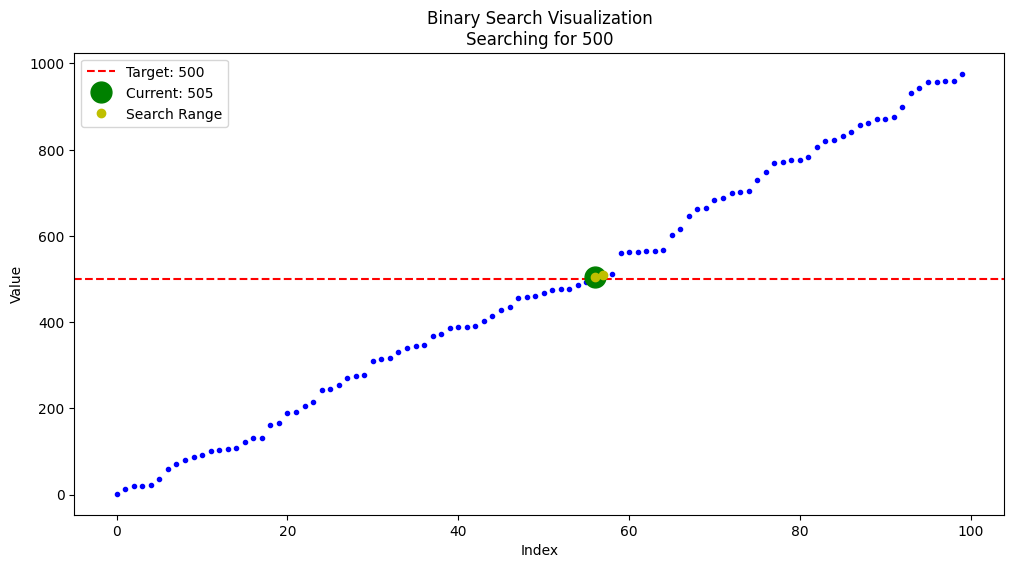

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def binary_search_visualization(df, target):
    """Generator that yields visualization states during binary search"""
    left = 0
    right = len(df) - 1
    
    while left <= right:
        mid = (left + right) // 2
        current = df.iloc[mid]['numbers']
        
        # Create visualization
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(df)), df['numbers'], 'b.')
        plt.axhline(y=target, color='r', linestyle='--', label=f'Target: {target}')
        plt.plot(mid, current, 'go', markersize=15, label=f'Current: {current}')
        plt.plot(range(left, right+1), df.iloc[left:right+1]['numbers'], 'y.', 
                markersize=12, label='Search Range')
        
        plt.title(f'Binary Search Visualization\nSearching for {target}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        
        yield plt.gcf()
        
        if current == target:
            break
        elif current < target:
            left = mid + 1
        else:
            right = mid - 1
            
# Function to run visualization
def run_binary_search_visualization(df, target):
    search_gen = binary_search_visualization(df, target)
    
    for fig in search_gen:
        clear_output(wait=True)
        plt.show()
        time.sleep(1)
        plt.close()

# Run the visualization
target = 500
run_binary_search_visualization(df, target)


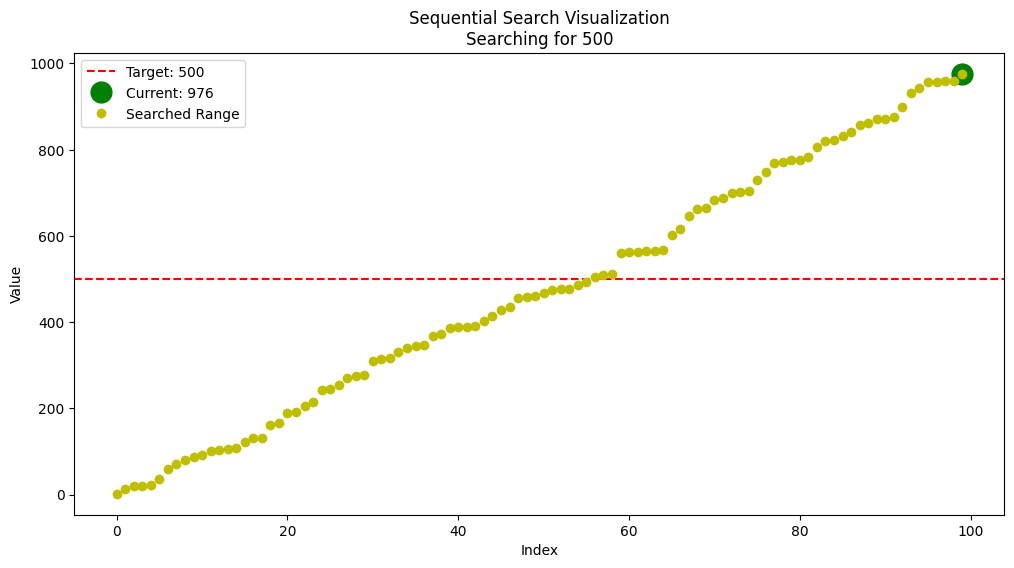

In [3]:
def sequential_search_visualization(df, target):
    """Generator that yields visualization states during sequential search"""
    for i in range(len(df)):
        current = df.iloc[i]['numbers']
        
        # Create visualization
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(df)), df['numbers'], 'b.')
        plt.axhline(y=target, color='r', linestyle='--', label=f'Target: {target}')
        plt.plot(i, current, 'go', markersize=15, label=f'Current: {current}')
        plt.plot(range(0, i+1), df.iloc[0:i+1]['numbers'], 'y.', 
                markersize=12, label='Searched Range')
        
        plt.title(f'Sequential Search Visualization\nSearching for {target}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        
        yield plt.gcf()
        
        if current == target:
            break

# Function to run visualization            
def run_sequential_search_visualization(df, target):
    search_gen = sequential_search_visualization(df, target)
    
    for fig in search_gen:
        clear_output(wait=True)
        plt.show()
        time.sleep(0.1)
        plt.close()

# Run the visualization
target = 500
run_sequential_search_visualization(df, target)


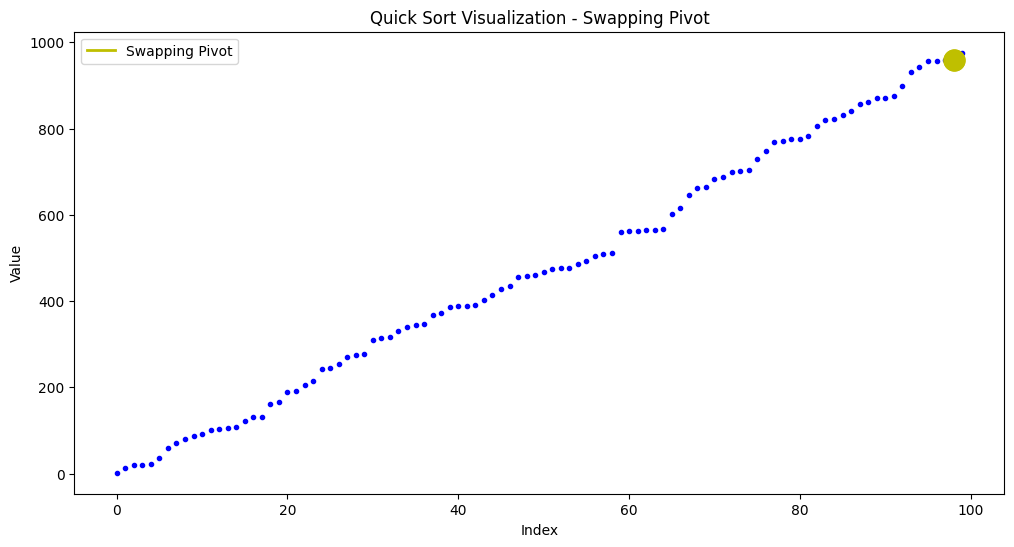

In [14]:
def bubble_sort_visualization(df):
    """Generator that yields visualization states during bubble sort"""
    data = df.copy()
    # Randomize the data first
    data = data.sample(frac=1).reset_index(drop=True)
    
    # Show initial randomized state
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(data)), data['numbers'], 'b.')
    plt.title('Initial Randomized State')
    plt.xlabel('Index')
    plt.ylabel('Value')
    yield plt.gcf()
    
    n = len(data)
    for i in range(n):
        for j in range(0, n-i-1):
            # Create visualization
            plt.figure(figsize=(12, 6))
            plt.plot(range(len(data)), data['numbers'], 'b.')
            plt.plot(j, data.iloc[j]['numbers'], 'go', markersize=15, label='Current')
            plt.plot(j+1, data.iloc[j+1]['numbers'], 'ro', markersize=15, label='Compare')
            
            plt.title('Bubble Sort Visualization')
            plt.xlabel('Index')
            plt.ylabel('Value')
            plt.legend()
            
            yield plt.gcf()
            
            # Swap if needed
            if data.iloc[j]['numbers'] > data.iloc[j+1]['numbers']:
                # Highlight the swap
                plt.figure(figsize=(12, 6))
                plt.plot(range(len(data)), data['numbers'], 'b.')
                plt.plot([j, j+1], [data.iloc[j]['numbers'], data.iloc[j+1]['numbers']], 
                        'y-', linewidth=2, label='Swapping')
                plt.plot(j, data.iloc[j]['numbers'], 'yo', markersize=15)
                plt.plot(j+1, data.iloc[j+1]['numbers'], 'yo', markersize=15)
                plt.title('Bubble Sort Visualization - Swapping')
                plt.xlabel('Index')
                plt.ylabel('Value')
                plt.legend()
                yield plt.gcf()
                
                # Perform swap
                data.iloc[j], data.iloc[j+1] = data.iloc[j+1].copy(), data.iloc[j].copy()

def quick_sort_visualization(df, low, high):
    """Generator that yields visualization states during quicksort"""
    if low == 0 and high == len(df)-1:
        # Randomize at start
        df = df.sample(frac=1).reset_index(drop=True)
        # Show initial randomized state
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(df)), df['numbers'], 'b.')
        plt.title('Initial Randomized State')
        plt.xlabel('Index')
        plt.ylabel('Value')
        yield plt.gcf()
        
    if low < high:
        pivot = df.iloc[high]['numbers']
        i = low - 1
        
        for j in range(low, high):
            plt.figure(figsize=(12, 6))
            plt.plot(range(len(df)), df['numbers'], 'b.')
            plt.axhline(y=pivot, color='r', linestyle='--', label=f'Pivot: {pivot}')
            plt.plot(j, df.iloc[j]['numbers'], 'go', markersize=15, label='Current')
            
            plt.title('Quick Sort Visualization')
            plt.xlabel('Index') 
            plt.ylabel('Value')
            plt.legend()
            
            yield plt.gcf()
            
            if df.iloc[j]['numbers'] <= pivot:
                i += 1
                # Highlight the swap
                if i != j:
                    plt.figure(figsize=(12, 6))
                    plt.plot(range(len(df)), df['numbers'], 'b.')
                    plt.plot([i, j], [df.iloc[i]['numbers'], df.iloc[j]['numbers']], 
                            'y-', linewidth=2, label='Swapping')
                    plt.plot(i, df.iloc[i]['numbers'], 'yo', markersize=15)
                    plt.plot(j, df.iloc[j]['numbers'], 'yo', markersize=15)
                    plt.title('Quick Sort Visualization - Swapping')
                    plt.xlabel('Index')
                    plt.ylabel('Value')
                    plt.legend()
                    yield plt.gcf()
                
                df.iloc[i], df.iloc[j] = df.iloc[j].copy(), df.iloc[i].copy()
        
        # Highlight pivot swap
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(df)), df['numbers'], 'b.')
        plt.plot([i+1, high], [df.iloc[i+1]['numbers'], df.iloc[high]['numbers']], 
                'y-', linewidth=2, label='Swapping Pivot')
        plt.plot(i+1, df.iloc[i+1]['numbers'], 'yo', markersize=15)
        plt.plot(high, df.iloc[high]['numbers'], 'yo', markersize=15)
        plt.title('Quick Sort Visualization - Swapping Pivot')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        yield plt.gcf()
        
        df.iloc[i+1], df.iloc[high] = df.iloc[high].copy(), df.iloc[i+1].copy()
        
        yield from quick_sort_visualization(df, low, i)
        yield from quick_sort_visualization(df, i+2, high)

def run_sorting_visualization(df, sort_type, delay=0.1):
    """Run visualization for specified sorting algorithm"""
    data = df.copy()
    
    if sort_type == 'bubble':
        sort_gen = bubble_sort_visualization(data)
    else:
        sort_gen = quick_sort_visualization(data, 0, len(data)-1)
        
    for fig in sort_gen:
        clear_output(wait=True)
        plt.show()
        time.sleep(delay)
        plt.close()

# Run visualizations
delay = 0

print("Bubble Sort Visualization:")
run_sorting_visualization(df, 'bubble', delay)




In [ ]:
print("\nQuick Sort Visualization:")
run_sorting_visualization(df, 'quick', delay)

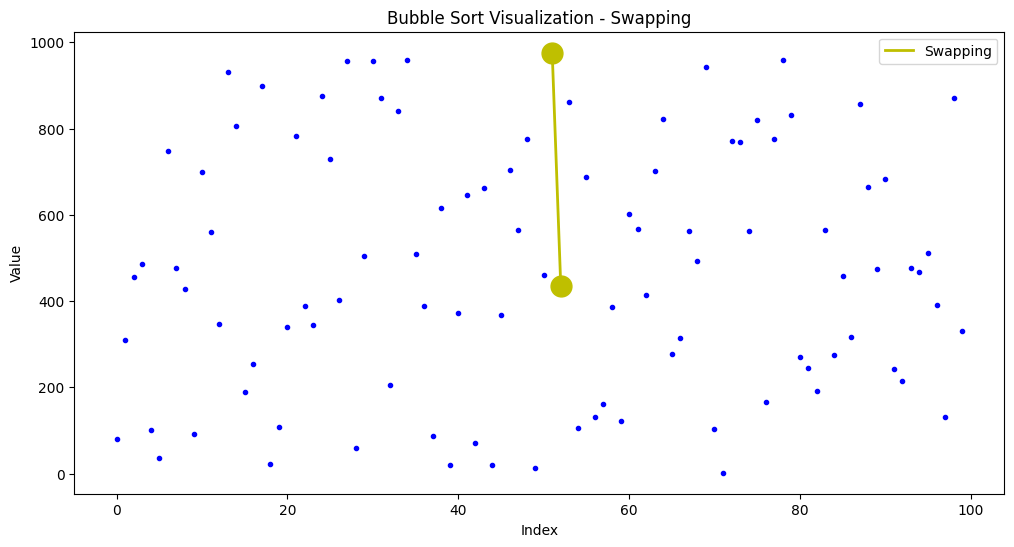

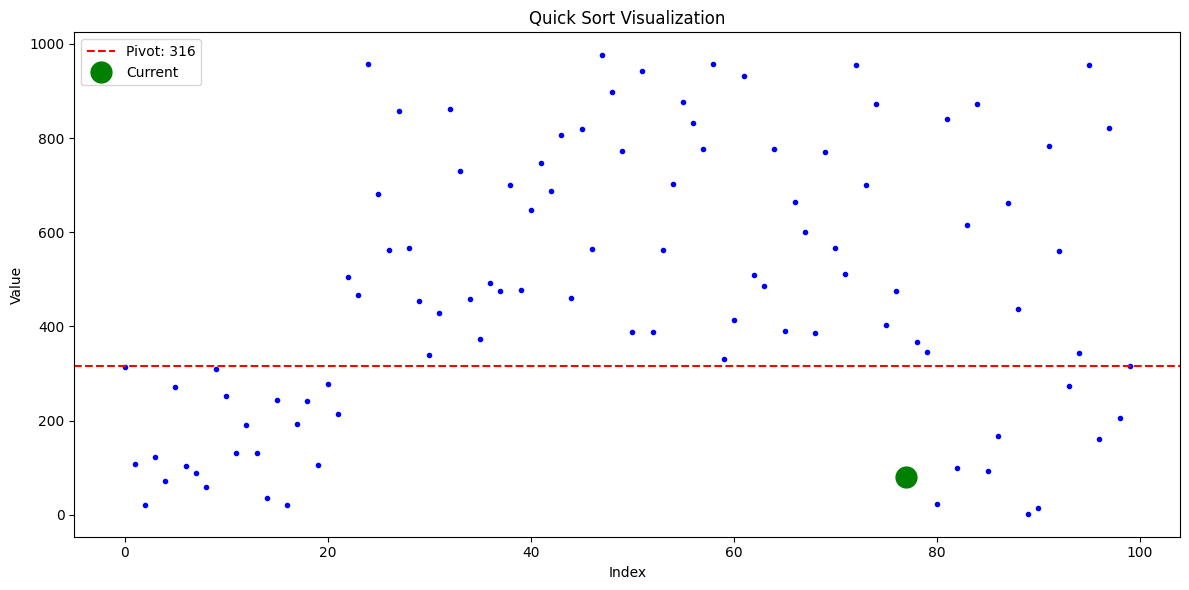

KeyboardInterrupt: 

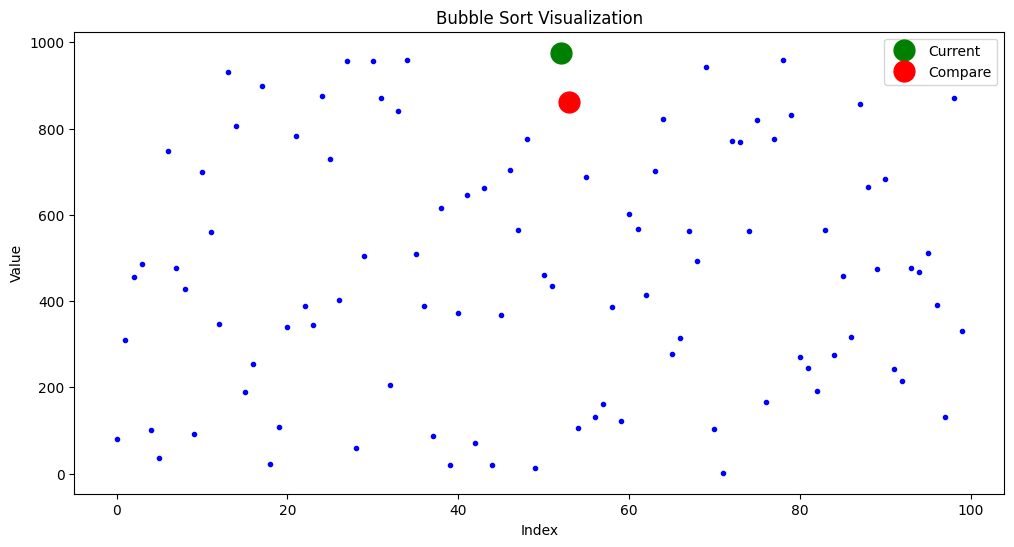

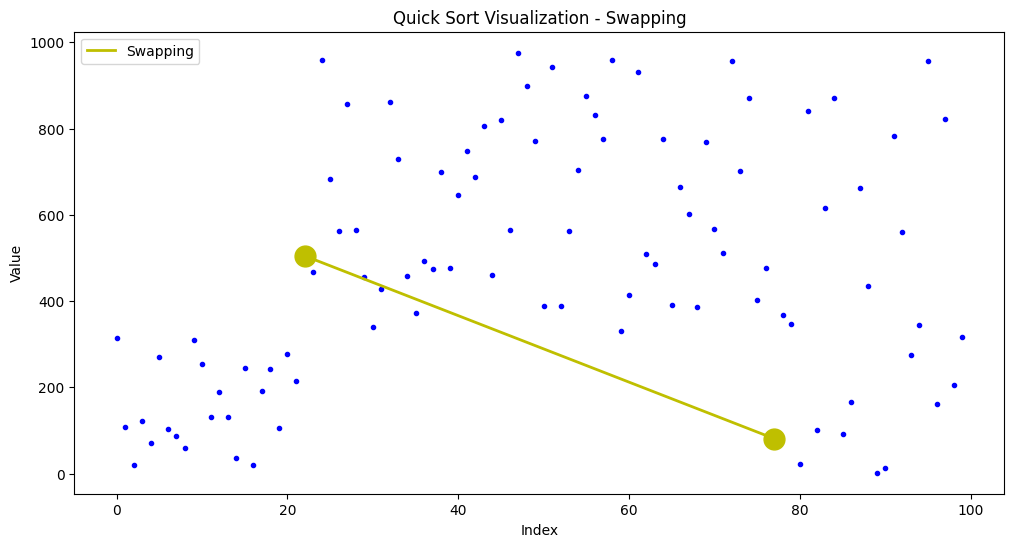

In [19]:
def run_side_by_side_visualization(df, delay=0.1):
    """Run bubble and quick sort visualizations side by side"""
    data_bubble = df.copy()
    data_quick = df.copy()
    
    bubble_gen = bubble_sort_visualization(data_bubble)
    quick_gen = quick_sort_visualization(data_quick, 0, len(data_quick)-1)
    
    # Create a single figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Set consistent axis limits to prevent flickering
    y_min = df['numbers'].min() - 5  # Add padding
    y_max = df['numbers'].max() + 5  # Add padding
    
    # Get initial plots
    try:
        while True:
            # Clear previous plots
            ax1.clear()
            ax2.clear()
            
            # Get next frame from each generator
            bubble_fig = next(bubble_gen)
            quick_fig = next(quick_gen)
            
            # Copy data from individual figures to subplots
            for line in bubble_fig.axes[0].get_lines():
                ax1.plot(line.get_xdata(), line.get_ydata(), 
                        color=line.get_color(),
                        linestyle=line.get_linestyle(),
                        marker=line.get_marker(),
                        label=line.get_label())
            
            for line in quick_fig.axes[0].get_lines():
                ax2.plot(line.get_xdata(), line.get_ydata(),
                        color=line.get_color(), 
                        linestyle=line.get_linestyle(),
                        marker=line.get_marker(),
                        label=line.get_label())
            
            # Set titles and labels
            ax1.set_title('Bubble Sort')
            ax1.set_xlabel('Index')
            ax1.set_ylabel('Value')
            ax1.legend()
            
            ax2.set_title('Quick Sort') 
            ax2.set_xlabel('Index')
            ax2.set_ylabel('Value')
            ax2.legend()
            
            # Set fixed axis limits to prevent flickering
            ax1.set_xlim(0, len(df))
            ax1.set_ylim(y_min, y_max)
            ax2.set_xlim(0, len(df))
            ax2.set_ylim(y_min, y_max)
            
            plt.tight_layout()
            clear_output(wait=True)
            plt.show()
            time.sleep(delay)
            
    except StopIteration:
        plt.close()

print("Side by Side Sorting Visualization:")
run_side_by_side_visualization(df, delay)
